In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

lddt_esmfold = []
lddt_plddt = []

lddt_random1 = []
lddt_random2 = []
lddt_random3 = []
lddt_random4 = []

fgr_ratio_cumulative_max = []
fgr_ratio_max = []
fgr_ratio_cumulative_threshold = []
fgr_ratio_threshold = []

lddt_max = []
c= 0

for file in os.listdir("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo_testset_2/logs"):
    # if file.endswith("_ttt.csv"):
    df = pd.read_csv(os.path.join("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo_testset_2/logs", file), sep="\t" )

    lddt_esmfold.append(df['lddt'][0])
    lddt_plddt.append(df['lddt'][df['plddt'].idxmax()])
    # choose random step with seed 1    

    np.random.seed(0)
    lddt_random1.append(df['lddt'][np.random.randint(0, len(df))])
    np.random.seed(1)
    lddt_random2.append(df['lddt'][np.random.randint(0, len(df))])
    np.random.seed(2)
    lddt_random3.append(df['lddt'][np.random.randint(0, len(df))])
    np.random.seed(3)
    lddt_random4.append(df['lddt'][np.random.randint(0, len(df))])
    c+= 1

    lddt_max.append(df['lddt'].max())

    fgr_ratio_cumulative_max.append(df['lddt'][df['fgr_ratio_cumulative'].idxmax()])
    fgr_ratio_max.append(df['lddt'][df['fgr_ratio'].idxmax()])
    # fgr_ratio_cumulative >= 8.35 → pick first step above threshold; else fallback to max fgr_ratio_cumulative.
    if df['fgr_ratio_cumulative'].max() >= 8.03:
        # print(df['lddt'][df['lddt'][df['fgr_ratio_cumulative'] >= 8.03].index[0]])
        fgr_ratio_cumulative_threshold.append(df['lddt'][df['lddt'][df['fgr_ratio_cumulative'] >= 8.03].index[0]])
    else:
        fgr_ratio_cumulative_threshold.append(df['lddt'][df['fgr_ratio_cumulative'].idxmax()])
        print("here")

    if df['fgr_ratio'].max() >= 45:
        fgr_ratio_threshold.append(df['lddt'][df['lddt'][df['fgr_ratio'] >= 45].index[0]])
    else:
        fgr_ratio_threshold.append(df['lddt'][df['fgr_ratio'].idxmax()])





print("esmfold: ", np.mean(lddt_esmfold))
print("plddt:    ", np.mean(lddt_plddt))
print("random1: ", np.mean(lddt_random1))
print("random2: ", np.mean(lddt_random2))
print("random3: ", np.mean(lddt_random3))
print("random4: ", np.mean(lddt_random4))
print("max: ", np.mean(lddt_max)) 
print("fgr_ratio_cumulative_max: ", np.mean(fgr_ratio_cumulative_max))
print("fgr_ratio_max: ", np.mean(fgr_ratio_max))
print("fgr_ratio_cumulative_threshold: ", np.mean(fgr_ratio_cumulative_threshold))
print("fgr_ratio_threshold: ", np.mean(fgr_ratio_threshold))
print(c)

here
esmfold:  0.5305954383186601
plddt:     0.5578522201655001
random1:  0.5335024375473973
random2:  0.5438816679448014
random3:  0.5449917424584219
random4:  0.5379499920267433
max:  0.5946534525232875
fgr_ratio_cumulative_max:  0.5457133601126921
fgr_ratio_max:  0.5497281941828527
fgr_ratio_cumulative_threshold:  0.5543149285470258
fgr_ratio_threshold:  0.5552158025568241
17


In [3]:
df = pd.read_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/LL/summary.csv")
df

,pdb_id,sequence,length
0,7er0,PFSVPNLPLNTLSNSRVPSLIRSMMVSRDHGQMVQFQNGRVTLDGQ...,303
1,7qii,LYPTAQSRSLWDFASPGYTFHGLHRAQDYRRELDTLQSLLTTSQSS...,73
2,7raw,TDTKIYFDASNLPAEWGTTKTVYCHLYAVAGDDLPETSWQGKAEKC...,235
3,7mq4,SAGIATFKLVLNGKTLKGETTTEAVDAATALKNFGAYAQDVGVDGA...,95
4,7tvy,RFTPLGIDEFYIKPCERKIVYTTDKHDKCLMRRLEIEMDTGENQGY...,139
5,7qre,ATVRKERDGSTVIRAEGKDAATQVRVENGTCVILATDMGSWCDDSL...,80
6,7oa7,DHHHHHHKVTIPSGKRYYYAGGITTPGGKVDIIYTESGWFLSDRAI...,344
7,7eqs,KPFSVPNLPLNTLSNSRVPSLINAMMISRDHGQMVQFQNGRVTLDG...,304
8,7qao,AFRQALQLAASGLAGGSAAVLFSAVAVGKPRAGGD,35
9,7x77,PWPGVPMSFFSNLRAVNKLYPNQASFITDNTRLLTSTPAGFTNVLN...,305


In [4]:
rows_to_drop = df.index
df.drop(rows_to_drop, inplace=True)
df

,pdb_id,sequence,length


In [6]:
df['pdb_id'] = ['ApoE3', 'ApoE2', 'ApoE4_dimer']
df['sequence'] = ['KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADMEDVCGRLVQYRGEVQAMLGQSTEELRVRLASHLRKLRKRLLRDADDLQKRLAVYQAGAREGAERGLSAIRERLGPLVEQGRVRAATVGSLAGQPLQERAQAWGERLRARMEEMGSRTRDRLDEVKEQVAEVRAKLEEQAQQIRLQAEAFQARLKSWFEPLVEDMQRQWAGLVEKVQAAVGTSAAPVPSDNH', 'KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADMEDVCGRLVQYRGEVQAMLGQSTEELRVRLASHLRKLRKRLLRDADDLQKRLAVYQAGAREGAERGLSAIRERLGPLVEQGVRAATVGSLAGQPLQERAQAWGERLRARMEEMGSRTRDRLDEVKEQVAEVRAKLEEQAQQIRLQAEAFQARLKSWFEPLVEDMQRQWAGLVEKVQAAVGTSAAPVPSDNH', 'KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADMEDVRGRLVQYRGEVQAMLGQSTEELRVRLASHLRKLRKRLLRDADDLQKRLAVYQAGAREGAERGLSAIRERLGPLVEQGRVRAATVGSLAGQPLQERAQAWGERLRARMEEMGSRTRDRLDEVKEQVAEVRAKLEEQAQQIRLQAEAFQARLKSWFEPLVEDMQRQWAGLVEKVQAAVGTSAAPVPSDNH']
df['length'] = df.sequence.apply(len)
df

,pdb_id,sequence,length
0,ApoE3,KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQ...,299
1,ApoE2,KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQ...,298
2,ApoE4_dimer,KVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQ...,299


In [7]:
df.to_csv("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/LL/summary.csv", index=False)

In [ ]:
from proteinttt.utils.parsers import extract_sequence_from_pdb
import pandas as pd
import os

data_dir = "/scratch/project/open-35-8/data/cameo/proteinttt_test"
records = []
for file in os.listdir(data_dir):
    if not file.endswith("_ttt.pdb") and file.endswith(".pdb"):
        sequence = extract_sequence_from_pdb(os.path.join(data_dir, file))
        records.append({"name": file.split(".")[0], "sequence": sequence['A']})

test_set = pd.DataFrame(records)
test_set['length'] = test_set['sequence'].apply(len)
test_set

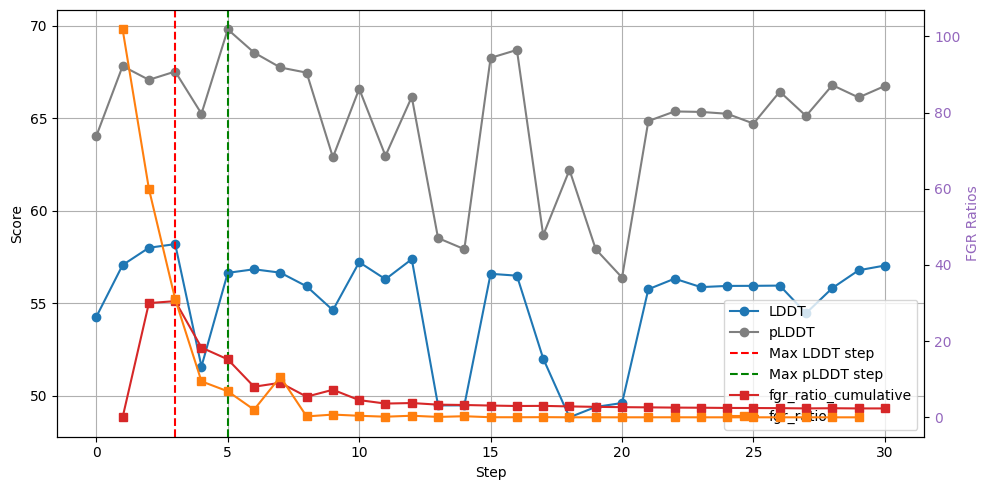

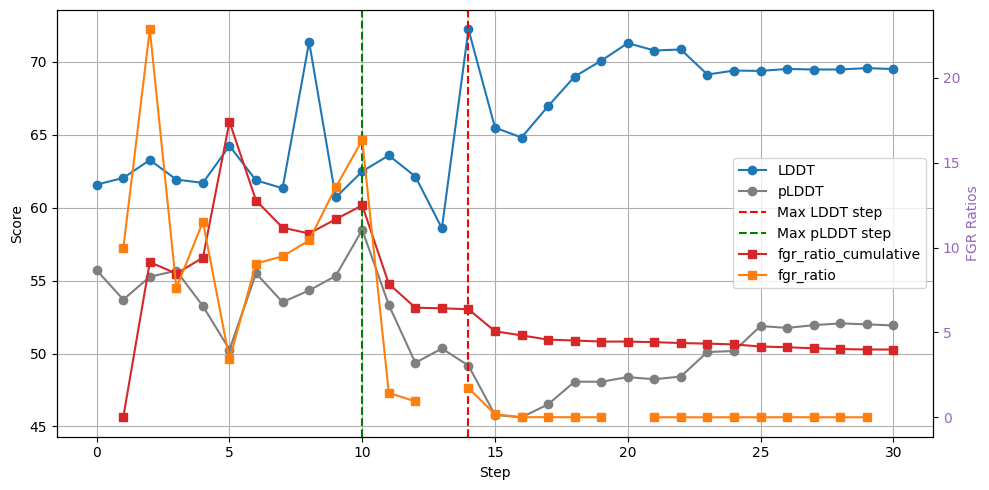

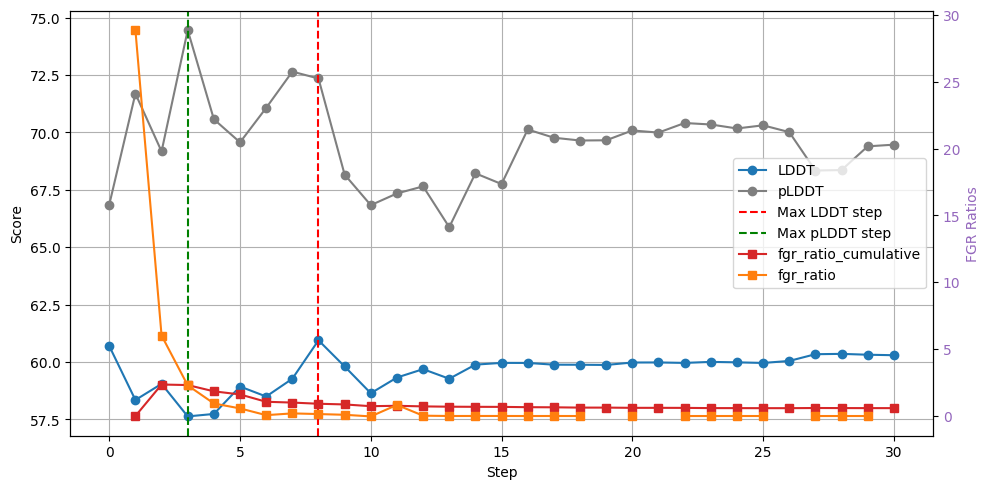

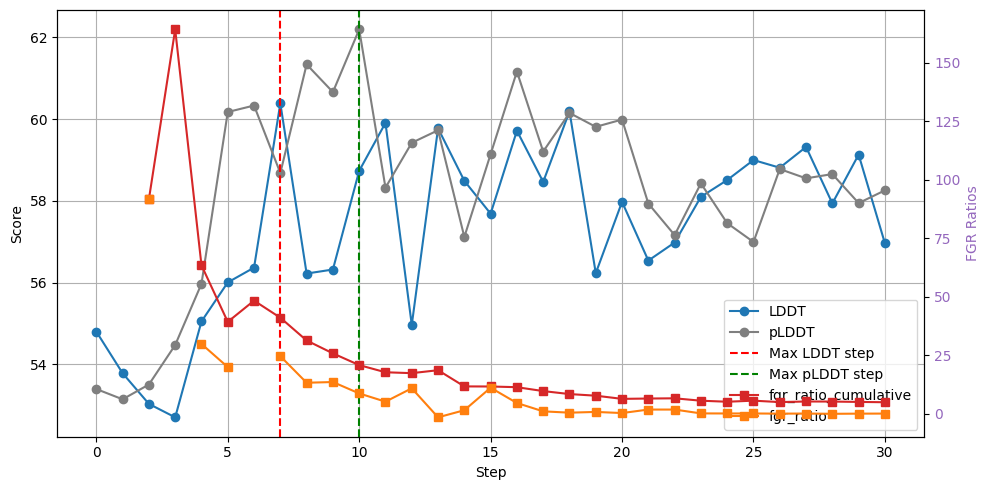

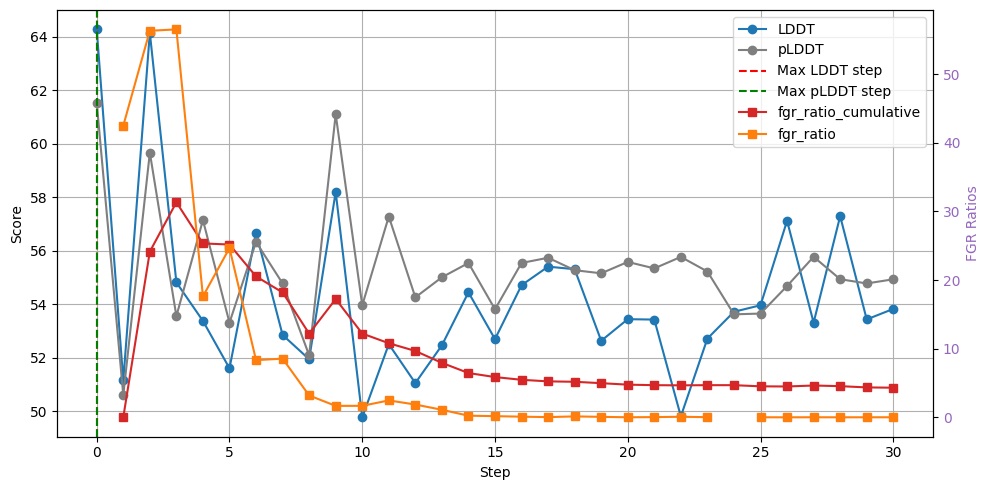

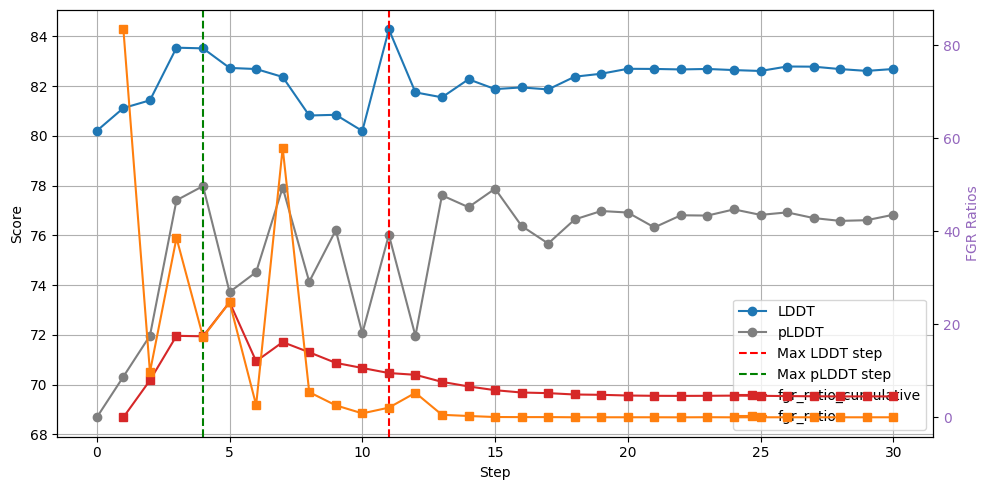

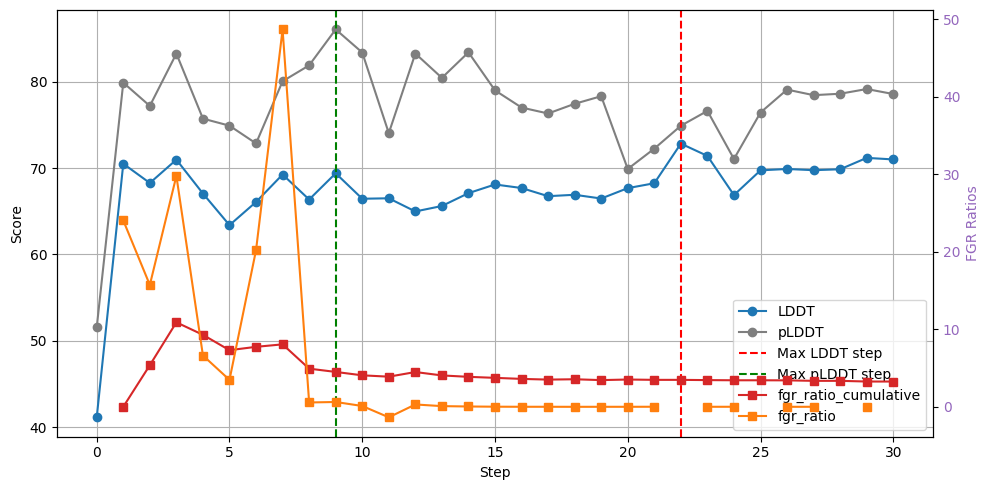

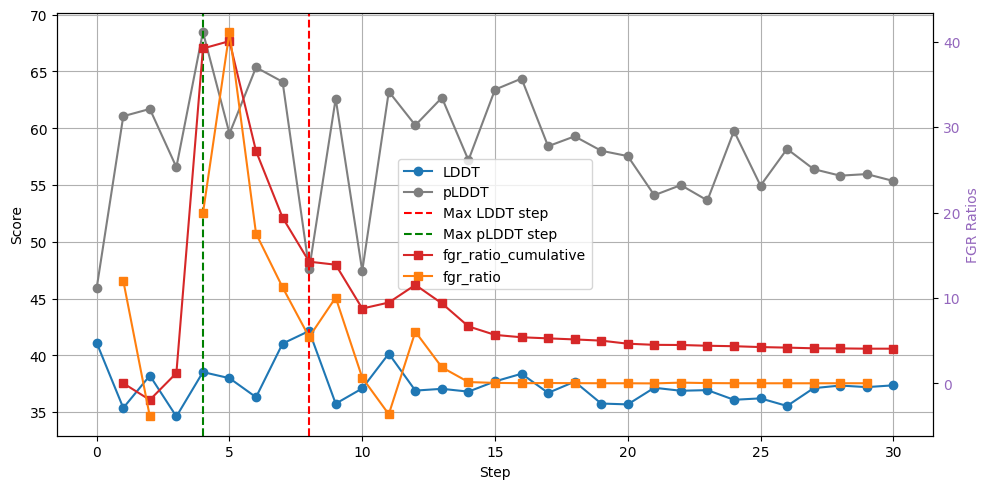

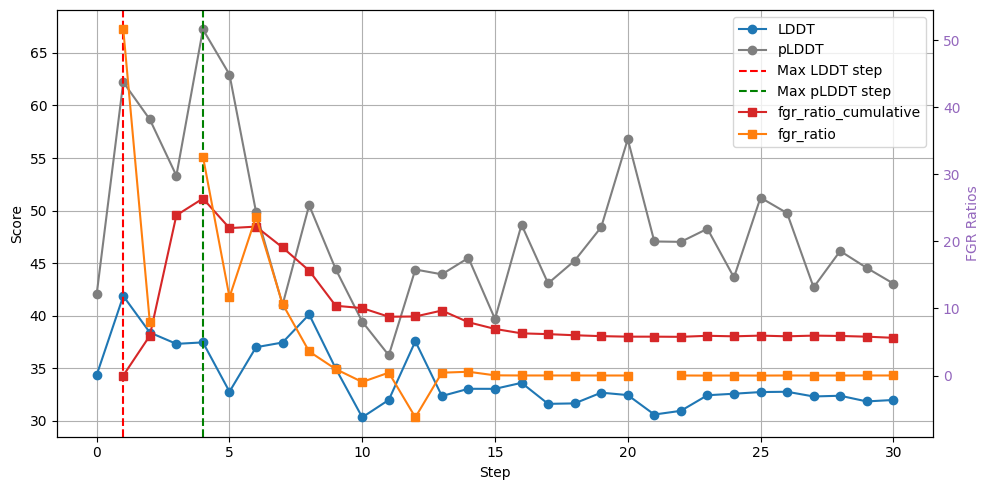

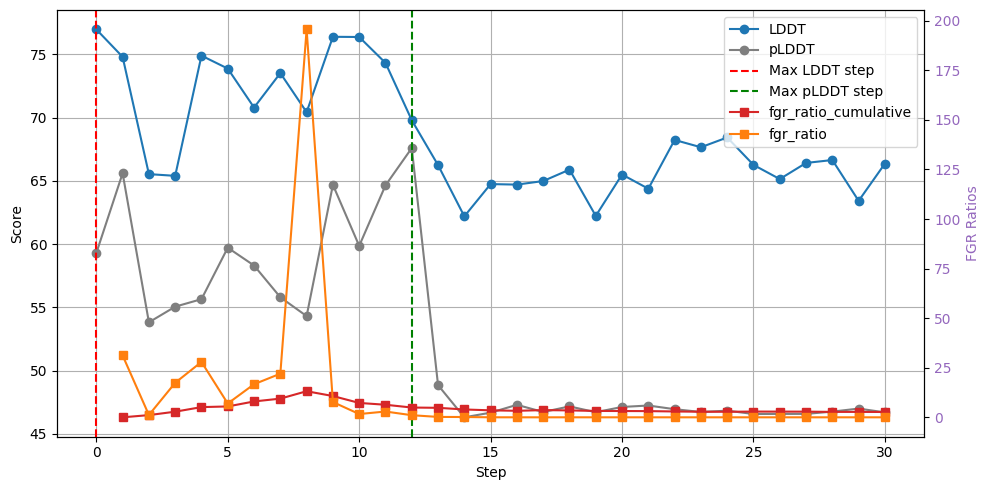

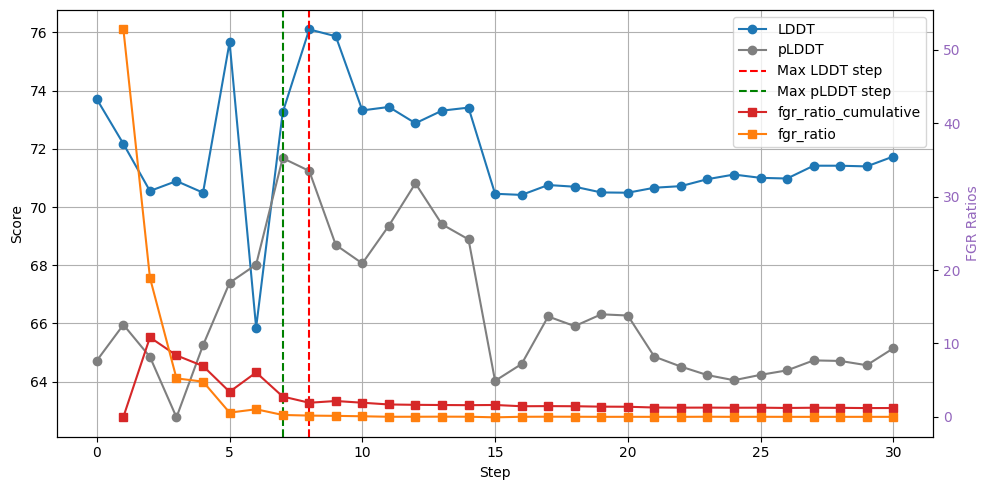

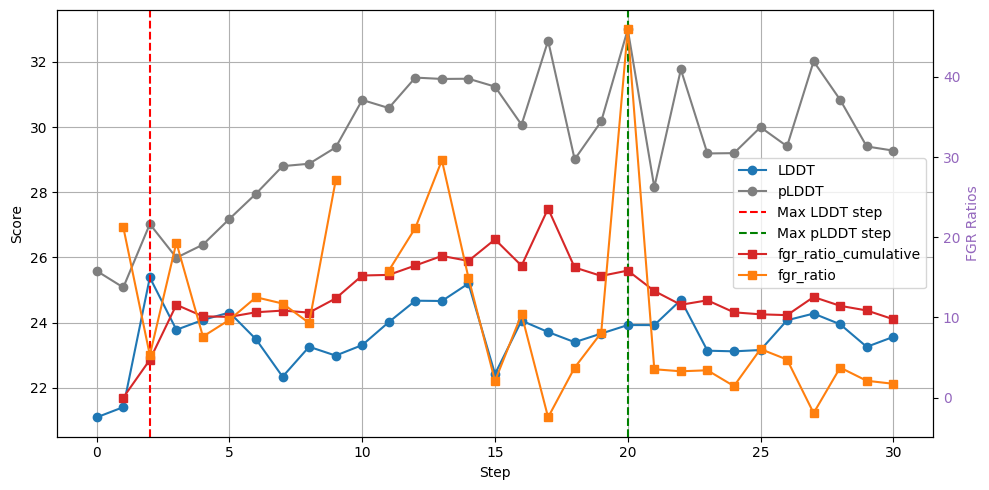

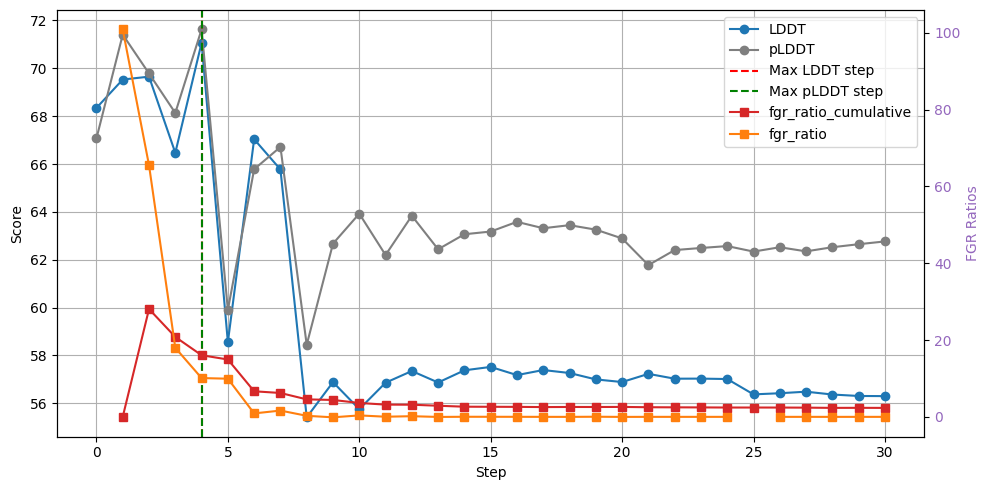

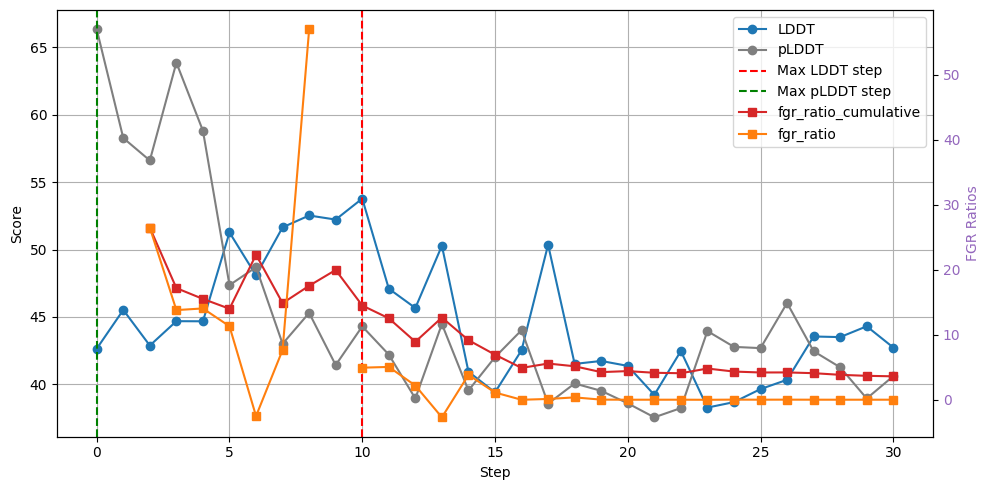

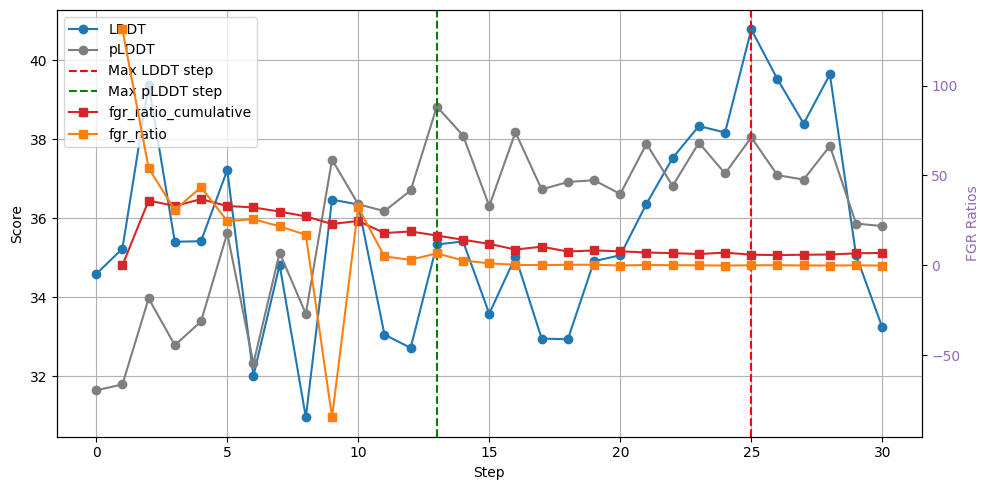

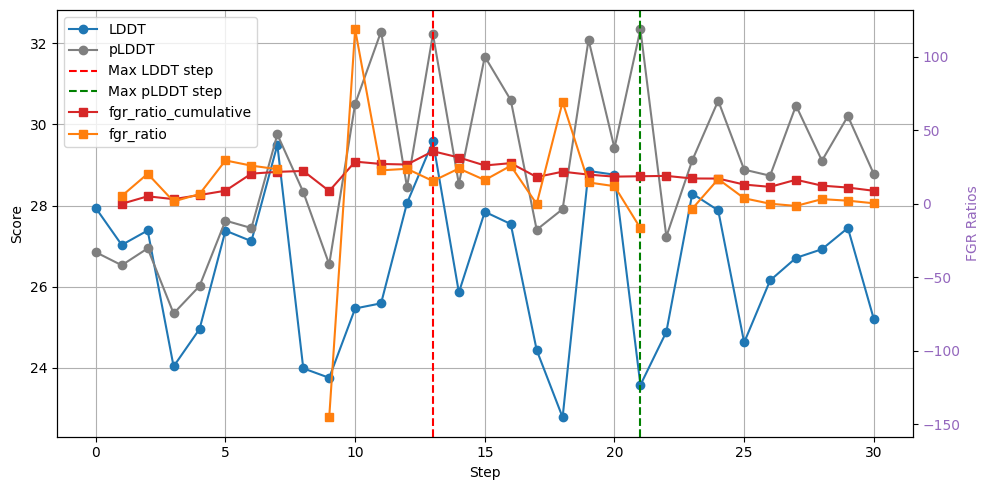

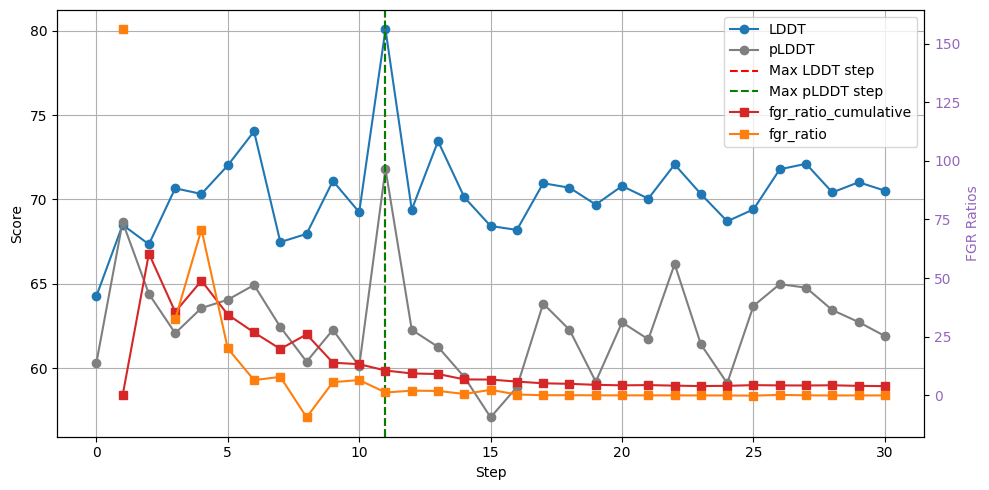

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for file in os.listdir("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo_testset_2/logs"):
    # if file.endswith("_ttt.csv"):
    df = pd.read_csv(os.path.join("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo_testset_2/logs", file), sep = '\t')

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Left y-axis: LDDT, pLDDT, perplexity
    ax1.plot(df['step'], df['lddt']*100, label='LDDT', marker='o', color='tab:blue')
    ax1.plot(df['step'], df['plddt'], label='pLDDT', marker='o', color='tab:gray')
    # ax1.plot(df['step'], df['perplexity'], label='perplexity', marker='s', color='tab:green')

    # Mark the step with the highest LDDT/pLDDT
    max_lddt_idx = df['lddt'].idxmax()
    max_lddt_step = df.loc[max_lddt_idx, 'step']
    ax1.axvline(x=max_lddt_step, color='red', linestyle='--', label='Max LDDT step')

    max_plddt_idx = df['plddt'].idxmax()
    max_plddt_step = df.loc[max_plddt_idx, 'step']
    ax1.axvline(x=max_plddt_step, color='green', linestyle='--', label='Max pLDDT step')

    ax1.set_xlabel("Step")
    ax1.set_ylabel("Score")
    ax1.grid(True)

    # Right y-axis: fgr_ratio_cumulative
    ax2 = ax1.twinx()
    ax2.plot(df['step'], df['fgr_ratio_cumulative'], label='fgr_ratio_cumulative', marker='s', color='tab:red')
    ax2.plot(df['step'], df['fgr_ratio'], label='fgr_ratio', marker='s', color='tab:orange')
    ax2.set_ylabel("FGR Ratios", color='tab:purple')
    ax2.tick_params(axis='y', labelcolor='tab:purple')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.tight_layout()
    plt.show()

In [14]:
#calculate corr between fgr_ratio and LDDT for all proteins
for file in os.listdir("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/notebooks/fgr/5"):
    if file.endswith("_ttt.csv"):
        df = pd.read_csv(os.path.join("/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/notebooks/fgr/5", file))
        print(df['fgr_ratio'].corr(df['lddt']))

0.38532897994936655
0.5801396261752972
0.6205903141560758
0.35485070025795856
0.6697717023917955
-0.44899554439174516
-0.18641795090211558
0.09189358068029121
0.25027915353273783
0.6787280508764806
0.6289599065007973
0.45240172530959866
-0.1978934124382076
-0.3933134385093137
0.6757247158316824
0.18632955413921815
0.04214233340057087
-0.26093404632443723


Mean max LDDT (oracle): 0.5946534525232875

Best fgr_ratio threshold (min mean gap to max LDDT):
threshold                      45.633976
mean_lddt                       0.555216
mean_gap_to_max                 0.039438
mean_improvement_vs_esmfold     0.024620
mean_step                       4.235294
hit_rate                        0.823529
improved_count                 10.000000
Name: 56, dtype: float64

Best fgr_ratio_cumulative threshold (min mean gap to max LDDT):
threshold                       8.032771
mean_lddt                       0.554315
mean_gap_to_max                 0.040339
mean_improvement_vs_esmfold     0.023719
mean_step                       2.823529
hit_rate                        0.941176
improved_count                 10.000000
Name: 6, dtype: float64

Top-5 fgr_ratio thresholds:
   threshold  mean_lddt  mean_gap_to_max  mean_improvement_vs_esmfold  \
0  45.633976   0.555216         0.039438                     0.024620   
1  49.042960   0.555216         0.039438

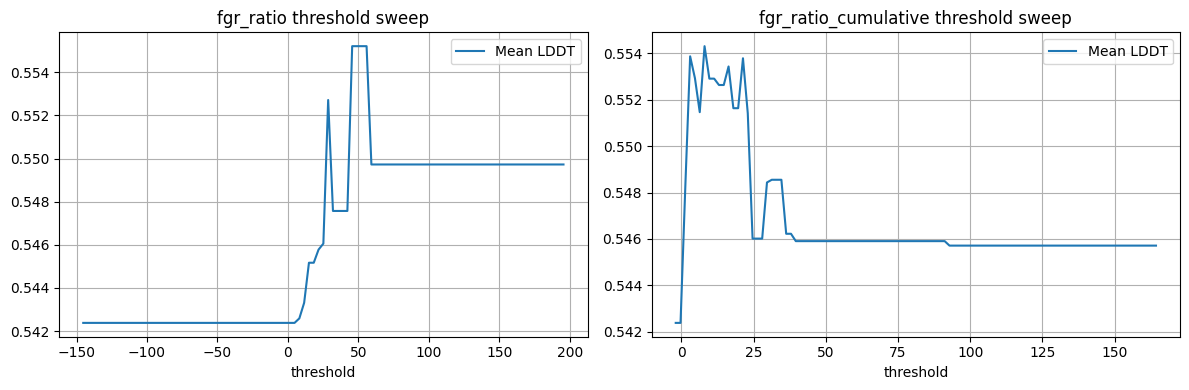

In [1]:
# Threshold search for fgr_ratio and fgr_ratio_cumulative
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/cameo_testset_2/logs"

protein_data = {}
for file in os.listdir(data_dir):
    # if file.endswith("_ttt.csv"):
    name = file.replace("_log.tsv", "")
    protein_data[name] = pd.read_csv(os.path.join(data_dir, file), sep = '\t')

lddt_max_by_protein = {name: df["lddt"].max() for name, df in protein_data.items()}
lddt_esm_by_protein = {name: df["lddt"].iloc[0] for name, df in protein_data.items()}


def pick_step_by_threshold(df, metric, threshold):
    valid = df[df[metric].notna()]
    if len(valid) == 0:
        idx = df["lddt"].idxmax()
        hit = False
        row = df.loc[idx]
        return row["step"], row["lddt"], hit

    hits = valid[valid[metric] >= threshold]
    if len(hits) > 0:
        idx = hits.index[0]
        hit = True
    else:
        idx = valid[metric].idxmax()
        hit = False
    row = df.loc[idx]
    return row["step"], row["lddt"], hit


def evaluate_thresholds(metric, n=101):
    all_vals = np.concatenate([df[metric].values for df in protein_data.values()])
    all_vals = all_vals[np.isfinite(all_vals)]
    thresholds = np.linspace(all_vals.min(), all_vals.max(), n)

    rows = []
    for t in thresholds:
        lddts = []
        steps = []
        gaps = []
        improvements = []
        hits = []

        for name, df in protein_data.items():
            step, lddt, hit = pick_step_by_threshold(df, metric, t)
            lddt_max = lddt_max_by_protein[name]
            lddt_esm = lddt_esm_by_protein[name]

            lddts.append(lddt)
            steps.append(step)
            gaps.append(lddt_max - lddt)
            improvements.append(lddt - lddt_esm)
            hits.append(hit)

        rows.append({
            "threshold": t,
            "mean_lddt": np.mean(lddts),
            "mean_gap_to_max": np.mean(gaps),
            "mean_improvement_vs_esmfold": np.mean(improvements),
            "mean_step": np.mean(steps),
            "hit_rate": np.mean(hits),
            "improved_count": int(np.sum(np.array(improvements) > 0))
        })

    return pd.DataFrame(rows)


results_ratio = evaluate_thresholds("fgr_ratio")
results_ratio_cum = evaluate_thresholds("fgr_ratio_cumulative")

best_ratio = results_ratio.loc[results_ratio["mean_gap_to_max"].idxmin()]
best_ratio_cum = results_ratio_cum.loc[results_ratio_cum["mean_gap_to_max"].idxmin()]

print("Mean max LDDT (oracle):", np.mean(list(lddt_max_by_protein.values())))
print("\nBest fgr_ratio threshold (min mean gap to max LDDT):")
print(best_ratio)
print("\nBest fgr_ratio_cumulative threshold (min mean gap to max LDDT):")
print(best_ratio_cum)

print("\nTop-5 fgr_ratio thresholds:")
print(results_ratio.nsmallest(5, "mean_gap_to_max").reset_index(drop=True))

print("\nTop-5 fgr_ratio_cumulative thresholds:")
print(results_ratio_cum.nsmallest(5, "mean_gap_to_max").reset_index(drop=True))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# ax[0].plot(results_ratio["threshold"], results_ratio["mean_gap_to_max"], label="Gap to max")
ax[0].plot(results_ratio["threshold"], results_ratio["mean_lddt"], label="Mean LDDT")
ax[0].set_title("fgr_ratio threshold sweep")
ax[0].set_xlabel("threshold")
ax[0].grid(True)
ax[0].legend()

# ax[1].plot(results_ratio_cum["threshold"], results_ratio_cum["mean_gap_to_max"], label="Gap to max")
ax[1].plot(results_ratio_cum["threshold"], results_ratio_cum["mean_lddt"], label="Mean LDDT")
ax[1].set_title("fgr_ratio_cumulative threshold sweep")
ax[1].set_xlabel("threshold")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

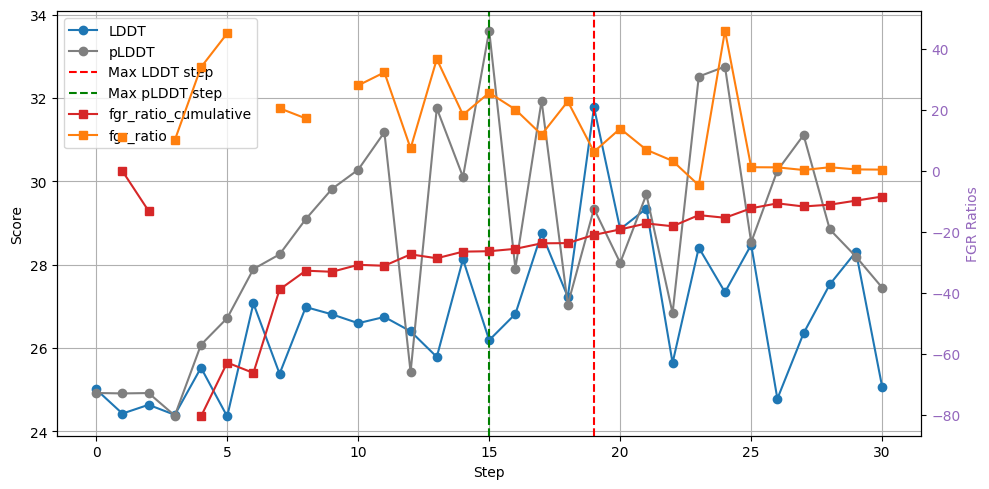

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis: LDDT, pLDDT, perplexity
ax1.plot(df['step'], df['lddt']*100, label='LDDT', marker='o', color='tab:blue')
ax1.plot(df['step'], df['plddt'], label='pLDDT', marker='o', color='tab:gray')
# ax1.plot(df['step'], df['perplexity'], label='perplexity', marker='s', color='tab:green')

# Mark the step with the highest LDDT/pLDDT
max_lddt_idx = df['lddt'].idxmax()
max_lddt_step = df.loc[max_lddt_idx, 'step']
ax1.axvline(x=max_lddt_step, color='red', linestyle='--', label='Max LDDT step')

max_plddt_idx = df['plddt'].idxmax()
max_plddt_step = df.loc[max_plddt_idx, 'step']
ax1.axvline(x=max_plddt_step, color='green', linestyle='--', label='Max pLDDT step')

ax1.set_xlabel("Step")
ax1.set_ylabel("Score")
ax1.grid(True)

# Right y-axis: fgr_ratio_cumulative
ax2 = ax1.twinx()
ax2.plot(df['step'], df['fgr_ratio_cumulative'], label='fgr_ratio_cumulative', marker='s', color='tab:red')
ax2.plot(df['step'], df['fgr_ratio'], label='fgr_ratio', marker='s', color='tab:orange')
ax2.set_ylabel("FGR Ratios", color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.tight_layout()
plt.show()

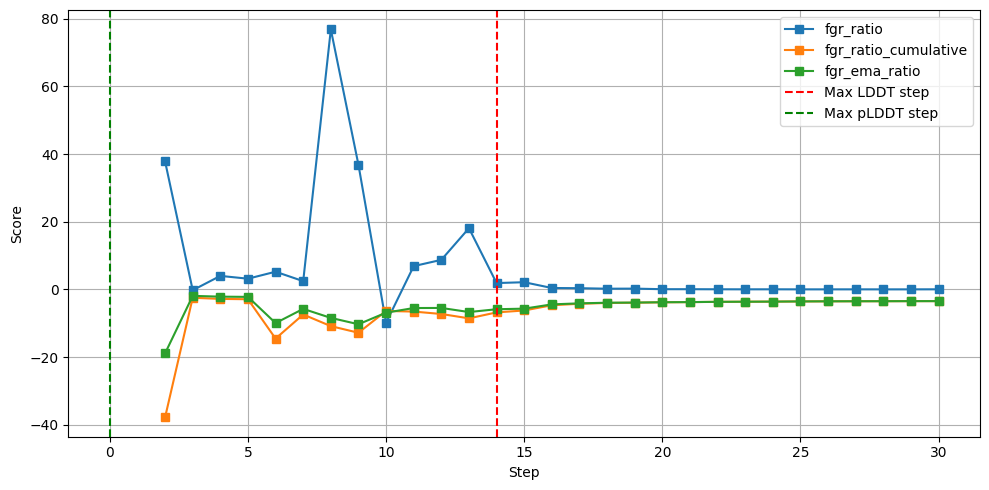

In [32]:
plt.figure(figsize=(10, 5))

plt.plot(df['step'], df['fgr_ratio'], label='fgr_ratio', marker='s')
plt.plot(df['step'], df['fgr_ratio_cumulative'], label='fgr_ratio_cumulative', marker='s')
plt.plot(df['step'], df['fgr_ema_ratio'], label='fgr_ema_ratio', marker='s')
max_lddt_idx = df['lddt'].idxmax()
max_lddt_step = df.loc[max_lddt_idx, 'step']
plt.axvline(x=max_lddt_step, color='red', linestyle='--', label='Max LDDT step')

max_plddt_idx = df['plddt'].idxmax()
max_plddt_step = df.loc[max_plddt_idx, 'step']
plt.axvline(x=max_plddt_step, color='green', linestyle='--', label='Max pLDDT step')

plt.xlabel("Step")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


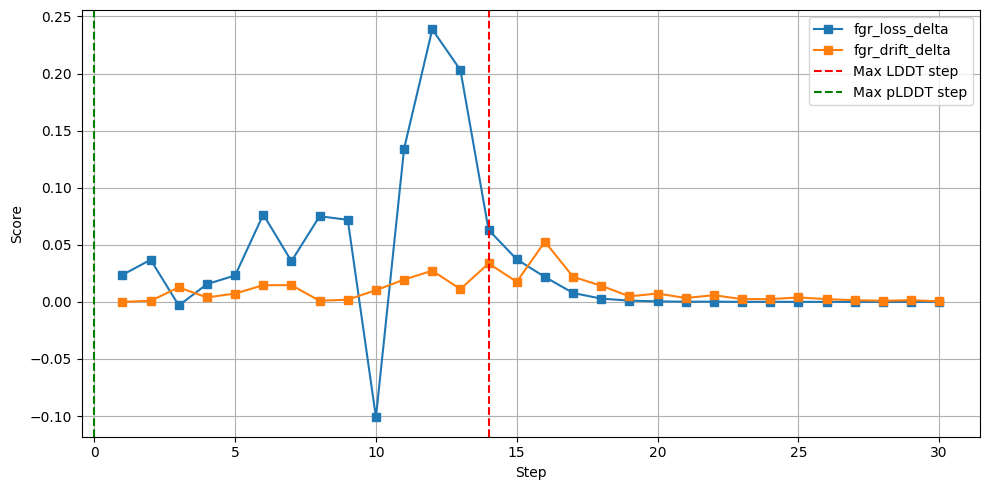

In [33]:
plt.figure(figsize=(10, 5))
# plt.plot(df['step'], df['fgr_ratio'], label='fgr_ratio', marker='s')
plt.plot(df['step'], df['fgr_loss_delta'], label='fgr_loss_delta', marker='s')
plt.plot(df['step'], df['fgr_drift_delta'], label='fgr_drift_delta', marker='s')

max_lddt_idx = df['lddt'].idxmax()
max_lddt_step = df.loc[max_lddt_idx, 'step']
plt.axvline(x=max_lddt_step, color='red', linestyle='--', label='Max LDDT step')

max_plddt_idx = df['plddt'].idxmax()
max_plddt_step = df.loc[max_plddt_idx, 'step']
plt.axvline(x=max_plddt_step, color='green', linestyle='--', label='Max pLDDT step')

plt.xlabel("Step")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

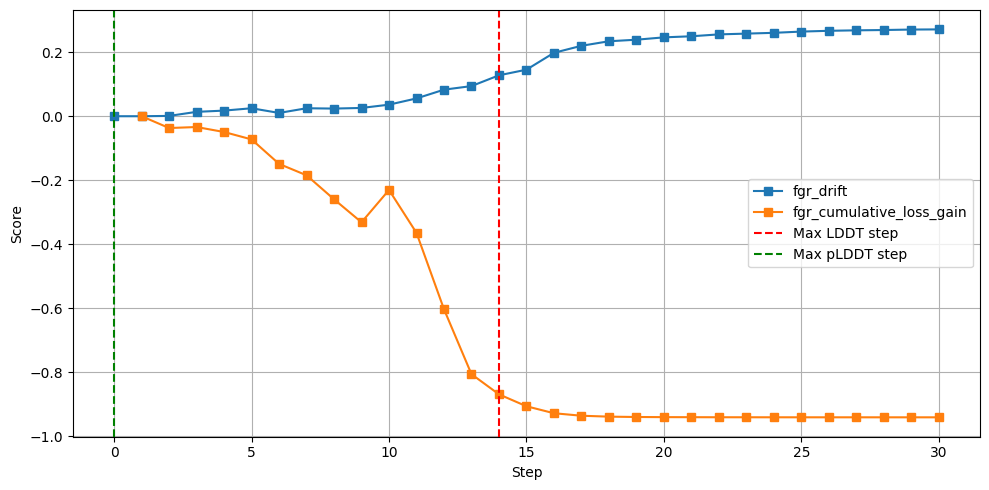

In [34]:
plt.figure(figsize=(10, 5))
# plt.plot(df['step'], df['fgr_ratio'], label='fgr_ratio', marker='s')
plt.plot(df['step'], df['fgr_drift'], label='fgr_drift', marker='s')
plt.plot(df['step'], df['_fgr_cumulative_loss_gain'], label='fgr_cumulative_loss_gain', marker='s')

max_lddt_idx = df['lddt'].idxmax()
max_lddt_step = df.loc[max_lddt_idx, 'step']
plt.axvline(x=max_lddt_step, color='red', linestyle='--', label='Max LDDT step')

max_plddt_idx = df['plddt'].idxmax()
max_plddt_step = df.loc[max_plddt_idx, 'step']
plt.axvline(x=max_plddt_step, color='green', linestyle='--', label='Max pLDDT step')

plt.xlabel("Step")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Build MSA

In [2]:
from proteinttt.utils.msa import MSAServer
msa_server = MSAServer(cache_dir='./msa_cache')
from Bio import SeqIO

fasta_file = "/scratch/project/open-35-8/data/cameo/proteinttt_test/aatype.fasta"
for record in SeqIO.parse(fasta_file, "fasta"):
    seq_id = record.id
    seq = str(record.seq)
    msa_server.get(seq, seq_id)

SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 10s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 9s. Reason: RATELIMIT
Sleeping for 6s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 5s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
SUBMIT:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]Sleeping for 7s. Reason: RATELIMIT
Sleeping for 10s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
Sleeping for 8s. Reason: RATELIMIT
Sleeping for 9s. Reason: RATELIMIT
COMPLETE: 100%|██████████| 150/150 [elapsed: 00:56 remaining: 00:00]


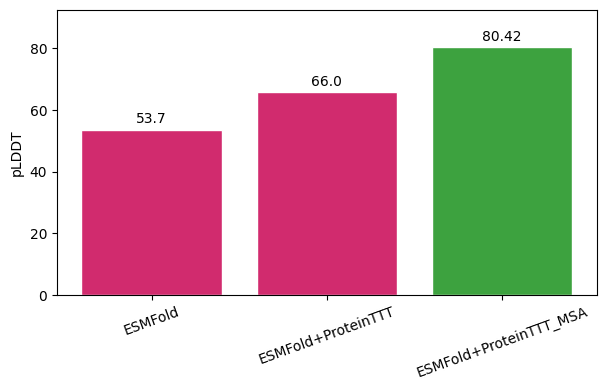

In [3]:
# Bar plot using the table values
import pandas as pd
import matplotlib.pyplot as plt

table_df = pd.DataFrame({
    "Method": [
        "ESMFold",
        "ESMFold+ProteinTTT",
        "ESMFold+ProteinTTT_MSA",
    ],
    "pLDDT": [53.7, 66.0, 80.42],
    "label": ["53.7", "66.0", "80.42"],
})

# Match the reference palette: magenta for baselines, green for ours
colors = ["#d12b6e", "#d12b6e", "#3da23f"]

fig, ax = plt.subplots(figsize=(6.2, 4))
bars = ax.bar(table_df["Method"], table_df["pLDDT"], color=colors, edgecolor="white", linewidth=1.0)

ax.set_ylabel("pLDDT")
ax.set_ylim(0, max(table_df["pLDDT"]) * 1.15)
ax.tick_params(axis="x", rotation=20)

for bar, label in zip(bars, table_df["label"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1.0,
        label,
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()
